Part 1: Classification with SVMs


In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Використовуємо тільки перші дві ознаки (довжина і ширина чашолистка)
y = iris.target

# Вибираємо тільки Setosa і Versicolor (класи 0 і 1)
X = X[y < 2]
y = y[y < 2]

# Розбиваємо на тренувальний і тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [4]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

lin_svc = LinearSVC(random_state=42, max_iter=10000)
lin_svc.fit(X_train_scaled, y_train)
y_pred_lin = lin_svc.predict(X_test_scaled)

print("LinearSVC accuracy:", accuracy_score(y_test, y_pred_lin))


LinearSVC accuracy: 1.0


In [5]:
from sklearn.svm import SVC

svc = SVC(kernel="linear", random_state=42)
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)

print("SVC accuracy:", accuracy_score(y_test, y_pred_svc))


SVC accuracy: 1.0


In [6]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", random_state=42)
sgd_clf.fit(X_train_scaled, y_train)
y_pred_sgd = sgd_clf.predict(X_test_scaled)

print("SGDClassifier accuracy:", accuracy_score(y_test, y_pred_sgd))


SGDClassifier accuracy: 1.0


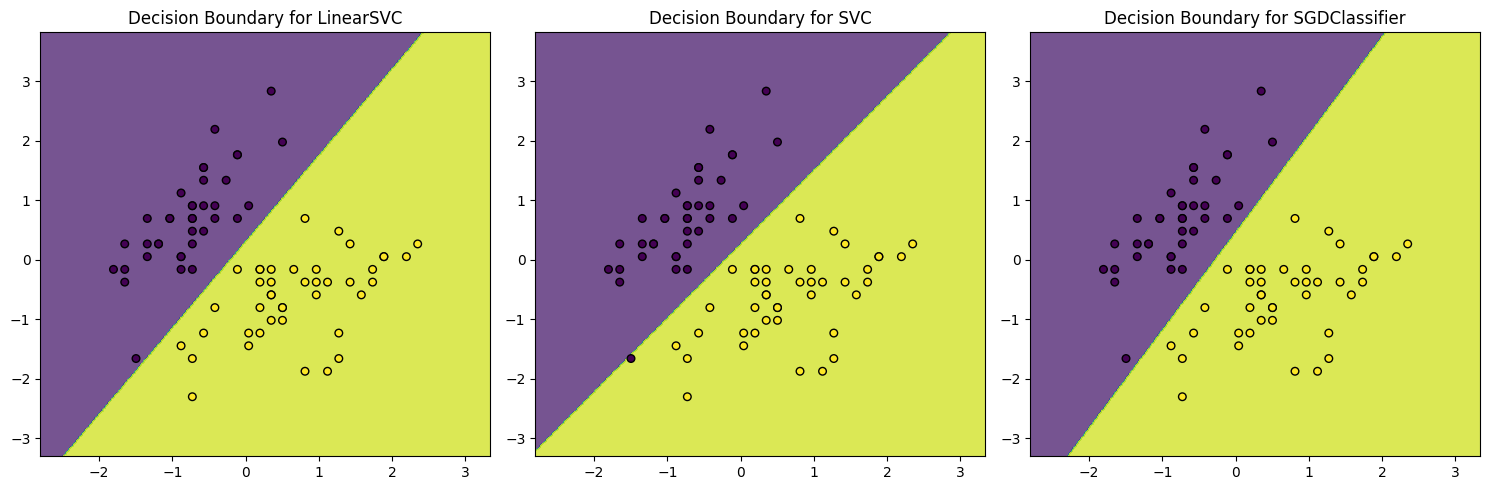

In [7]:
# Візуалізація для лінійних моделей
import matplotlib.pyplot as plt
import numpy as np

# Створення функції для візуалізації рішення
def plot_decision_boundary(clf, X, y, ax):
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.75)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', marker='o')
    ax.set_title(f"Decision Boundary for {clf.__class__.__name__}")
    return scatter

# Створення графіків для кожного моделі
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Лінійний SVC
plot_decision_boundary(lin_svc, X_train_scaled, y_train, axes[0])

# SVC з лінійним ядром
plot_decision_boundary(svc, X_train_scaled, y_train, axes[1])

# SGDClassifier
plot_decision_boundary(sgd_clf, X_train_scaled, y_train, axes[2])

plt.tight_layout()
plt.show()


Part 2: Regression with SVM


In [8]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target  # Ціль у $100,000s

# Розбиваємо на тренувальний і тестовий набір
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [10]:
from sklearn.svm import LinearSVR
from sklearn.metrics import mean_squared_error

lin_svr = LinearSVR(random_state=42, max_iter=10000)
lin_svr.fit(X_train_scaled, y_train)

y_pred_lin_svr = lin_svr.predict(X_test_scaled)
mse_lin_svr = mean_squared_error(y_test, y_pred_lin_svr)
rmse_lin_svr = np.sqrt(mse_lin_svr)

print("LinearSVR RMSE:", rmse_lin_svr)


LinearSVR RMSE: 0.7659274332664302


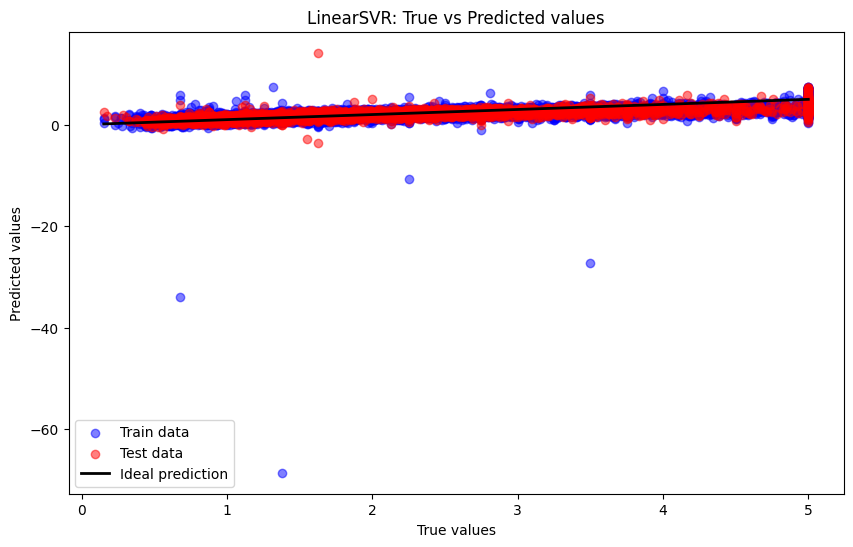

In [11]:
# Візуалізація прогнозів для LinearSVR
plt.figure(figsize=(10, 6))

# Прогнозування
y_train_pred = lin_svr.predict(X_train_scaled)
y_test_pred = lin_svr.predict(X_test_scaled)

# Графік реальних і прогнозованих значень
plt.scatter(y_train, y_train_pred, color="blue", label="Train data", alpha=0.5)
plt.scatter(y_test, y_test_pred, color="red", label="Test data", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', lw=2, label="Ideal prediction")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("LinearSVR: True vs Predicted values")
plt.legend()
plt.show()


In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

# Визначаємо параметри для пошуку
param_distributions = {
    "gamma": reciprocal(0.001, 0.1),
    "C": uniform(1, 10),
}

svr = SVR(kernel="rbf")

random_search = RandomizedSearchCV(
    svr, param_distributions, n_iter=10, scoring="neg_mean_squared_error", cv=5, random_state=42
)
random_search.fit(X_train_scaled, y_train)

# Зберігаємо найкращу модель
best_svr = random_search.best_estimator_

y_test_pred_rbf_optimized = best_svr.predict(X_test_scaled)
final_mse = mean_squared_error(y_test, y_test_pred_rbf_optimized)
final_rmse = np.sqrt(final_mse)

print(f"Final RMSE after optimization: {final_rmse}")


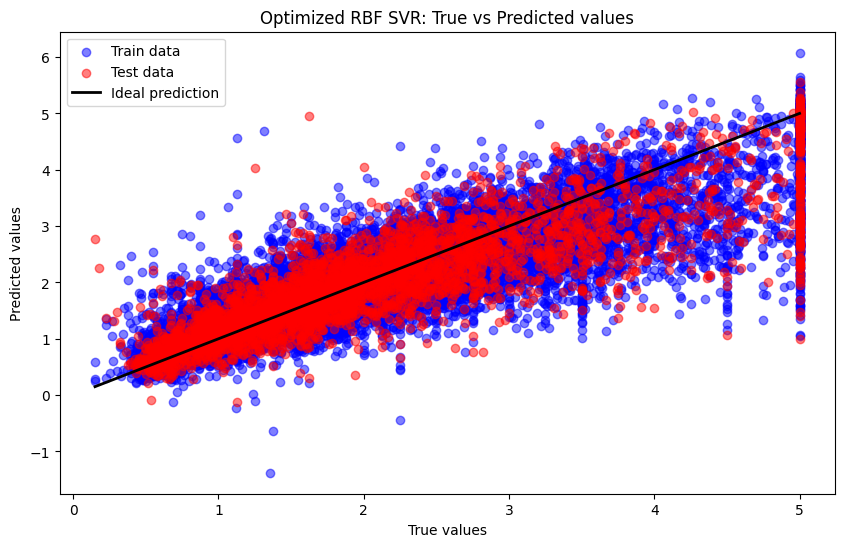

In [63]:
# Візуалізація прогнозів для оптимізованої моделі
plt.figure(figsize=(10, 6))

# Прогнозування з RBF SVR
y_train_pred_rbf = best_svr.predict(X_train_scaled)
y_test_pred_rbf = best_svr.predict(X_test_scaled)

# Графік реальних і прогнозованих значень
plt.scatter(y_train, y_train_pred_rbf, color="blue", label="Train data", alpha=0.5)
plt.scatter(y_test, y_test_pred_rbf, color="red", label="Test data", alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', lw=2, label="Ideal prediction")
plt.xlabel("True values")
plt.ylabel("Predicted values")
plt.title("Optimized RBF SVR: True vs Predicted values")
plt.legend()
plt.show()


In [79]:
import pandas as pd
from sklearn.datasets import fetch_california_housing

# Завантажуємо датасет
housing_bunch = fetch_california_housing()

# Перетворюємо в DataFrame
housing = pd.DataFrame(housing_bunch.data, columns=housing_bunch.feature_names)

# Додаємо цільову змінну
housing["target"] = housing_bunch.target

# Тепер head() працюватиме без помилок
print(housing.head())


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


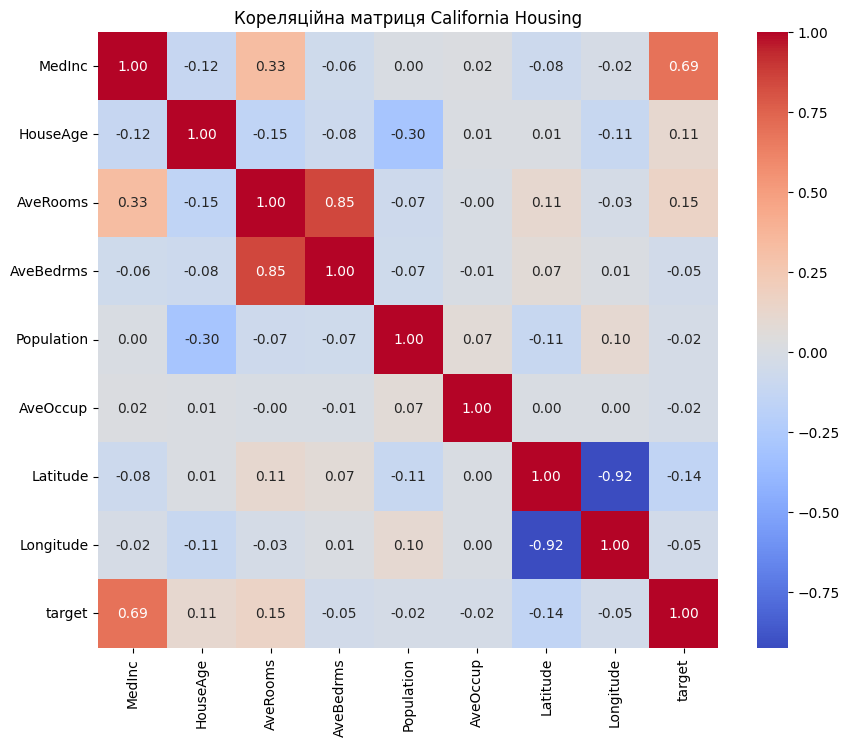

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(housing.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Кореляційна матриця California Housing")
plt.show()


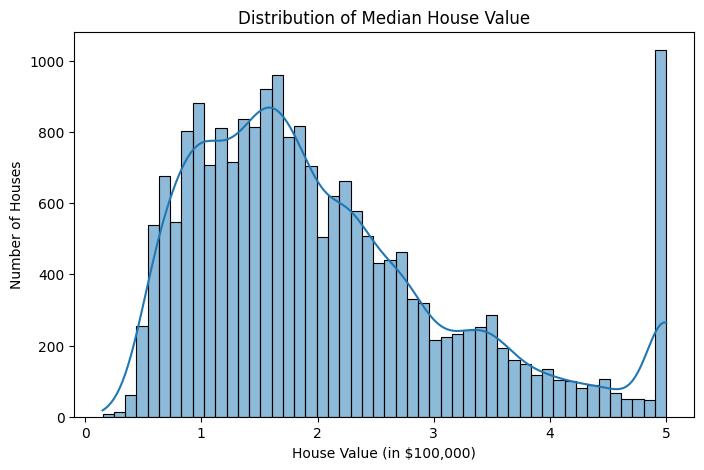

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(housing["target"], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value (in $100,000)")
plt.ylabel("Number of Houses")
plt.show()
